<a href="https://colab.research.google.com/github/vnmt/Nhom8KmeasClustering/blob/main/%C4%90%E1%BB%92_%C3%81N_NH%C3%93M_8_%22PH%C3%82N_C%E1%BB%A4M_D%E1%BB%AE_LI%E1%BB%86U_C%C3%81C_M%E1%BA%AAU_R%C6%AF%E1%BB%A2U%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET:

Link tải dataset rượu Đỏ: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

Link tải dataset rượu Trắng: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [ ]:
# Import Thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dữ liệu (file.csv)
df_r = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_w = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [ ]:

# Quy định kiểu 
df_r['wine_type'] = 'red'
df_w['wine_type'] = 'white'


In [ ]:
# Thông tin loại rượu Đỏ (Red-r)
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [ ]:
# Thông tin loại rượu Trắng (White-w)
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine_type             4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [ ]:
# Mô tả dữ liệu 
# Vì có khoảng 5000 rượu vang trắng và chỉ 1500 rượu vang đỏ, nên có sự mất cân bằng về dữ liệu. Nên hạn chế rượu trắng để chọn ngẫu nhiên 1500
# Cân bằng giữa 2 loại rượu 
df = df_w.sample(n = 1500)
df = df.append(df_r)
df.reset_index(inplace=True)

In [ ]:
# Thông tin cân bằng giữa 2 loại rượu Đỏ và Trắng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 3099 non-null   int64  
 1   fixed acidity         3099 non-null   float64
 2   volatile acidity      3099 non-null   float64
 3   citric acid           3099 non-null   float64
 4   residual sugar        3099 non-null   float64
 5   chlorides             3099 non-null   float64
 6   free sulfur dioxide   3099 non-null   float64
 7   total sulfur dioxide  3099 non-null   float64
 8   density               3099 non-null   float64
 9   pH                    3099 non-null   float64
 10  sulphates             3099 non-null   float64
 11  alcohol               3099 non-null   float64
 12  quality               3099 non-null   int64  
 13  wine_type             3099 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 339.1+ KB


In [ ]:
# Tiến hành Mã Hóa Nhãn 
# Dùng LabelEncoder để biến đổi 'wine_type' từ biến phân loại thành các giá trị (0 và 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['wine_type'] = labelencoder.fit_transform(df['wine_type'])

In [ ]:
# Import thư viện sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Chuẩn hóa dữ liệu 
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df.iloc[ : , :13])
# Gán dữ liệu được chia tỉ lệ cho X
X = scaled_df
true_labels = df.iloc[ : , 13]

In [ ]:
# Tạo mô hình K-Means 
# Chọn K=2 (Centroids - tương ứng với 2 loại rượu Đỏ và Trắng)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
predictions = kmeans.fit_predict(X)

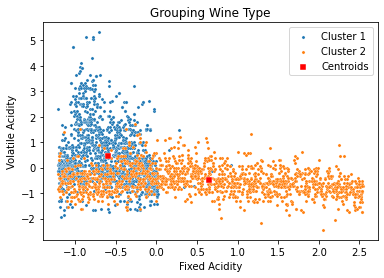

In [ ]:
# Hình dụng các cụm 
sns.scatterplot(x=X[predictions == 0, 0], y=X[predictions == 0, 1], palette="deep", label = 'Cluster 1',s=10)
sns.scatterplot(x=X[predictions == 1, 0], y=X[predictions == 1, 1], palette="deep", label = 'Cluster 2',s=10)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=30,marker=',')
plt.grid(False)
plt.title('Grouping Wine Type')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend()
plt.show()

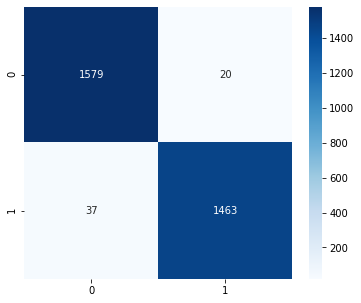

In [ ]:
#	Tính toán ma trận nhầm lẫn để đánh giá độ chính xác của phân loại 2 loại rượu Đỏ và rượu Trắng 
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize = (6,5))
sns.heatmap(confusion_matrix(true_labels.to_numpy().astype("int"), predictions), annot=True, fmt='g', cmap='Blues')

  Thuật toán K-Means Clustering có thể phân nhóm các loại rượu khác nhau dựa trên chất lượng và hàm lượng rượu. Thuật toán đã dự đoán đúng 1579 trên 1599 loại rượu vang đỏ và 1463 trên 1500 loại rượu vang trắng. Độ chính xác khoảng 98%, cho thấy rằng mô hình tạo ra có khả năng xác định các loại rượu.
  Mục đích là các loại rượu vang được phân loại thành 2 - Rượu vang đỏ hoặc Rượu trắng. 